**1. Получение данных**

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

data_set = pd.read_csv('../base/Laptop_price.csv')
display(data_set.describe())

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [26]:
duplicates_count = data_set.duplicated().sum()
display(f"Количество дубликатов: {duplicates_count}")

for i in range(len(data_set.columns)):
    duplicates = data_set[data_set.columns[i]].duplicated().sum()
    print(f"дубликатов {data_set.columns[i]}: {duplicates}")

'Количество дубликатов: 0'

дубликатов Brand: 995
дубликатов Processor_Speed: 0
дубликатов RAM_Size: 996
дубликатов Storage_Capacity: 997
дубликатов Screen_Size: 0
дубликатов Weight: 0
дубликатов Price: 0


<AxesSubplot: >

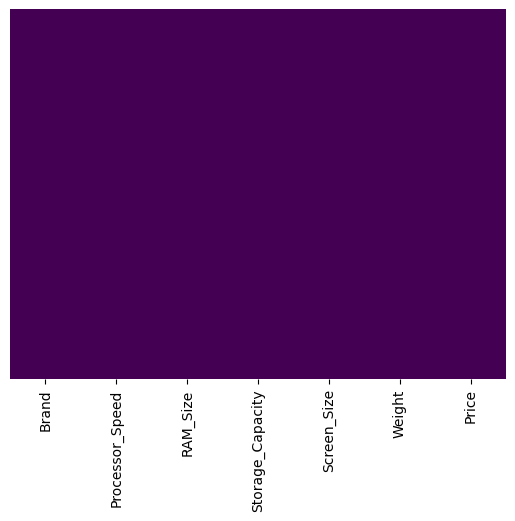

In [27]:
sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**2. Очистка данных**

In [28]:
tmp = data_set.copy()
tmp.drop_duplicates(inplace=True)
# display(cleanDS.describe())

In [29]:
dfNumerical = tmp.select_dtypes(include = [np.number])
dfCategorical = tmp.select_dtypes(exclude = [np.number])
display(dfNumerical.describe())
display(dfCategorical.describe())

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


,Brand
count,1000
unique,5
top,Dell
freq,210


In [30]:
display(dfNumerical.nunique())
display(dfCategorical.nunique())

Processor_Speed     1000
RAM_Size               4
Storage_Capacity       3
Screen_Size         1000
Weight              1000
Price               1000
dtype: int64

Brand    5
dtype: int64

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder = LabelEncoder()
encoderData = encoder.fit_transform(dfCategorical.values)
encoderDF = pd.DataFrame(encoderData, columns=['Brand'])
# da = pd.DataFrame(data_new.toarray(), columns=encoder.categories_)
display(encoderDF.describe())
print(encoder.classes_)

/usr/lib/python3/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Brand
count,1000.000000
mean,1.956000
std,1.404292
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


['Acer' 'Asus' 'Dell' 'HP' 'Lenovo']


In [32]:
cleanData = pd.concat([dfNumerical, encoderDF], axis=1)
display(cleanData.describe())

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963,1.956000
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880,1.404292
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950,0.000000
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948,1.000000
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878,2.000000
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754,3.000000
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037,4.000000


### **3. Дискретизация данных**  

In [33]:
baseDF = cleanData.copy()
# baseDF = data_set.copy()
df = pd.DataFrame()
dfLength = len(baseDF)
# print(f'data_set length: {dfLength}')
for i in range(len(baseDF.columns)):
    if baseDF[baseDF.columns[i]].dtype != np.float_:
      df.insert(i, baseDF.columns[i], baseDF[baseDF.columns[i]])
    else:
      df.insert(i, baseDF.columns[i], np.arange(dfLength, dtype='int64'))
display(df)

def discretizeFloatToInt(out, y, column):
  nStep = 5
  ma = max(y)
  mi = min(y)
  step = (ma - mi) / nStep
  # print(f'max: {max(y)}, min: {min(y)}, step: {step}')
  for i in range(len(y)):
    for idx in range(1, nStep + 1):
      if y[i] <= mi + idx * step:
        # print(f"y[i] = {y[i]}, [{mi + (idx - 1) * step}, {mi + idx * step}], index: {idx}")
        out.at[i, column] = idx
        break

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand
0,0,16,512,0,0,0,1
1,1,4,1000,1,1,1,0
2,2,4,256,2,2,2,4
3,3,16,512,3,3,3,0
4,4,32,1000,4,4,4,0
...,...,...,...,...,...,...,...
995,995,4,1000,995,995,995,3
996,996,8,256,996,996,996,2
997,997,4,512,997,997,997,2
998,998,8,256,998,998,998,1


In [34]:
for i in range(len(baseDF.columns)):
    # print(baseDF[baseDF.columns[i]].dtype)
    if baseDF[baseDF.columns[i]].dtype == np.float64:
        # print("discretized")
        discretizeFloatToInt(df, baseDF[baseDF.columns[i]], baseDF.columns[i])
display(df.describe())
display(df)

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.005000,15.500000,584.576000,3.055000,2.959000,2.662000,1.956000
std,1.431441,10.988665,313.438517,1.379086,1.423849,1.719509,1.404292
min,1.000000,4.000000,256.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,8.000000,256.000000,2.000000,2.000000,1.000000,1.000000
50%,3.000000,16.000000,512.000000,3.000000,3.000000,2.000000,2.000000
75%,4.000000,32.000000,1000.000000,4.000000,4.000000,5.000000,3.000000
max,5.000000,32.000000,1000.000000,5.000000,5.000000,5.000000,4.000000


,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand
0,5,16,512,1,2,2,1
1,3,4,1000,1,3,5,0
2,4,4,256,1,1,1,4
3,5,16,512,2,5,2,0
4,4,32,1000,4,4,5,0
...,...,...,...,...,...,...,...
995,4,4,1000,2,2,5,3
996,3,8,256,2,3,1,2
997,4,4,512,2,3,2,2
998,1,8,256,1,4,1,1


**4. Выделение признаков**

In [35]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Processor_Speed: [5 3 4 1 2]
RAM_Size: [16  4 32  8]
Storage_Capacity: [ 512 1000  256]
Screen_Size: [1 2 4 3 5]
Weight: [2 3 1 5 4]
Price: [2 5 1 3]
Brand: [1 0 4 3 2]


## Gain Ratio

In [36]:
# Entropy 
def entropy(y):
  counts = np.bincount(y)
  probabilities = counts / len(y)
  return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Information Gain (IG)
def informationGain(dataSet, featureClass, featureIdx):
  totalEntropy = entropy(featureClass)
  values, counts = np.unique(dataSet[:, featureIdx], return_counts=True)
  weightedEntropy = 0

  for value, count in zip(values, counts):
      subset = featureClass[dataSet[:, featureIdx] == value]
      weightedEntropy += (count / len(dataSet)) * entropy(subset)

  return totalEntropy - weightedEntropy

# Split Information (SI)
def splitInformation(dataSet, featureIdx):
    values, counts = np.unique(dataSet[:, featureIdx], return_counts=True)
    probabilities = counts / len(dataSet)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Gain Ratio
def gainRatio(dataSet, featureClass, featureIdx):
    ig = informationGain(dataSet, featureClass, featureIdx)
    iv = splitInformation(dataSet, featureIdx)
    return ig / iv if iv != 0 else 0

In [37]:
ds = df.drop(['Price'], axis=1)
columns = ds.columns.tolist()
ds = ds.values
y = df['Price'].values
scores = [gainRatio(ds, y, i) for i in range(ds.shape[1])]

ranking = np.argsort(scores)[::-1]
print("Gain Ratio:")
for i in ranking:
    print(f"{columns[i]}: {scores[i]:.5f}")

Gain Ratio:
Storage_Capacity: 1.00000
RAM_Size: 0.01319
Processor_Speed: 0.00708
Screen_Size: 0.00481
Brand: 0.00477
Weight: 0.00331


In [39]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, VarianceThreshold
# x = df.drop(['Brand', 'Price'], axis=1)
x = df.drop(['Price'], axis=1)
y = df['Price']
display(x.describe())
tmpSelector = VarianceThreshold()
X_train_filtered = tmpSelector.fit_transform(x)
kbest = SelectKBest(score_func = f_classif, k = 'all')
kbest.fit(X_train_filtered, y)

scores = kbest.scores_
feature_names = x.columns
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]
sorted_features = [feature_names[i] for i in sorted_indices]

print("Признаки в порядке значимости:")
for feature, score in zip(sorted_features, sorted_scores):
    print(f"{feature}: {score:.2f}")


,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Brand
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.005000,15.500000,584.576000,3.055000,2.959000,1.956000
std,1.431441,10.988665,313.438517,1.379086,1.423849,1.404292
min,1.000000,4.000000,256.000000,1.000000,1.000000,0.000000
25%,2.000000,8.000000,256.000000,2.000000,2.000000,1.000000
50%,3.000000,16.000000,512.000000,3.000000,3.000000,2.000000
75%,4.000000,32.000000,1000.000000,4.000000,4.000000,3.000000
max,5.000000,32.000000,1000.000000,5.000000,5.000000,4.000000


Признаки в порядке значимости:
Storage_Capacity: inf
RAM_Size: 8.80
Processor_Speed: 5.48
Weight: 0.92
Brand: 0.88
Screen_Size: 0.49


/usr/lib/python3/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


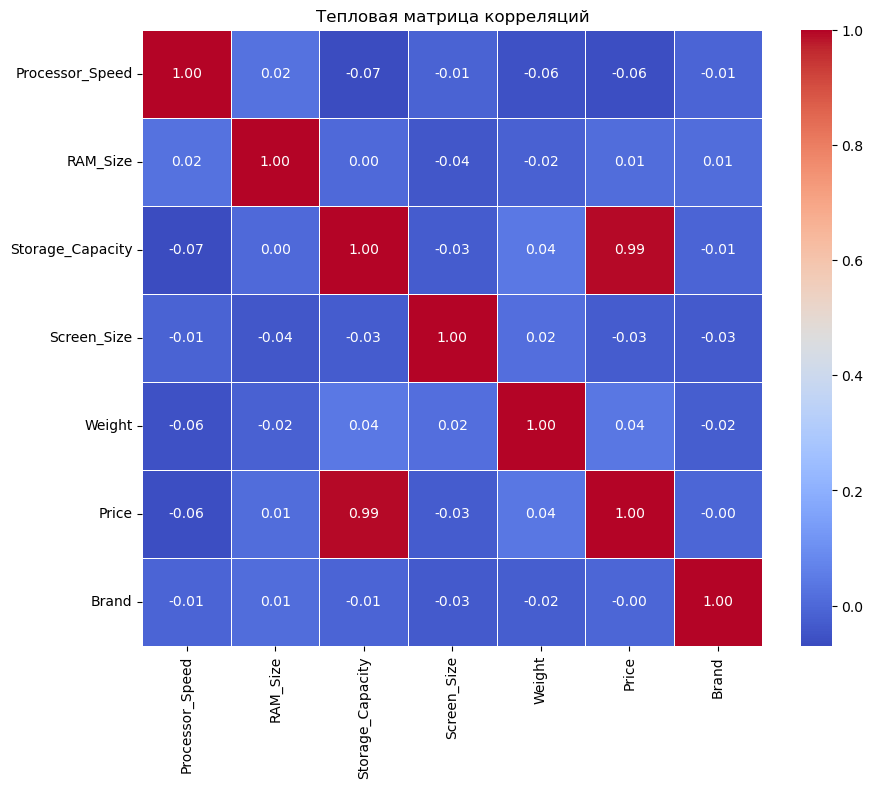

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr_matrix = df.drop(['Brand'], axis=1).corr()
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая матрица корреляций')
plt.show()